In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=5

#### Loading Data

In [3]:
import splitfolders
splitfolders.ratio('PlantVillage', output="Dataset", seed=1337, ratio=(0.7,0.1,0.2)) 

Copying files: 2152 files [00:20, 103.97 files/s]


#### Image Augmentation

In [3]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        'dataset/train',  # this is the input directory
        target_size = (IMAGE_SIZE, IMAGE_SIZE), 
        batch_size = BATCH_SIZE,
        class_mode = 'sparse',
        color_mode="rgb")
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        class_mode='sparse',
        color_mode="rgb")
test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        class_mode = 'sparse',
        color_mode = "rgb")

Found 1506 images belonging to 3 classes.
Found 215 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


In [5]:
train_generator

#### Model Building using CNN

In [6]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential ([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
      
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [8]:
train_generator.n 

1506

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,    #The 2 slashes division return rounded integer
        epochs = 25,verbose = 1,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

C:\Users\saras\AppData\Local\Temp\ipykernel_11468\3224406122.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
47/47 [==============================] - 33s 679ms/step - loss: 0.7163 - accuracy: 0.6445 - val_loss: 0.5051 - val_accuracy: 0.7500
Epoch 2/25
47/47 [==============================] - 31s 654ms/step - loss: 0.3739 - accuracy: 0.8528 - val_loss: 0.6720 - val_accuracy: 0.7448
Epoch 3/25
47/47 [==============================] - 30s 633ms/step - loss: 0.3249 - accuracy: 0.8664 - val_loss: 0.2607 - val_accuracy: 0.8958
Epoch 4/25
47/47 [==============================] - 31s 667ms/step - loss: 0.2062 - accuracy: 0.9179 - val_loss: 0.1873 - val_accuracy: 0.9323
Epoch 5/25
47/47 [==============================] - 31s 678ms/step - loss: 0.1717 - accuracy: 0.9355 - val_loss: 0.2272 - val_accuracy: 0.9010
Epoch 6/25
47/47 [==============================] - 32s 668ms/step - loss: 0.1398 - accuracy: 0.9464 - val_loss: 0.1860 - val_accuracy: 0.9427
Epoch 7/25
47/47 [==============================] - 30s 642ms/step - loss: 0.1648 - accuracy: 0.9430 - val_loss: 0.1502 - val_accuracy: 0.9323

In [11]:
from tensorflow.keras.models import load_model
model.save('bestmodel_CNN.h5')
model = load_model('bestmodel_CNN.h5')

c:\Users\saras\steffysara\VS_Code_Projects\Potato_Disease_Classifier\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Model Evaluation

In [12]:
scores=model.evaluate(test_generator)

14/14 [==============================] - 3s 169ms/step - loss: 0.1614 - accuracy: 0.9466


In [13]:
scores

[0.16143156588077545, 0.9466357231140137]

In [14]:
history

In [15]:
history.params 

{'verbose': 1, 'epochs': 25, 'steps': 47}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
history.history['accuracy']

[0.644504725933075,
 0.8527815341949463,
 0.8663500547409058,
 0.9179104566574097,
 0.9355494976043701,
 0.9464043378829956,
 0.9430122375488281,
 0.9389416575431824,
 0.9701492786407471,
 0.974219799041748,
 0.9369063973426819,
 0.9538670182228088,
 0.9660786986351013,
 0.9409769177436829,
 0.9748982191085815,
 0.9626865386962891,
 0.9640434384346008,
 0.9545454382896423,
 0.9701492786407471,
 0.9721845388412476,
 0.9769335389137268,
 0.9748982191085815,
 0.9803256392478943,
 0.975576639175415,
 0.9830393195152283]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

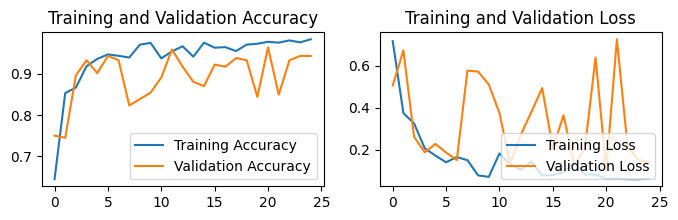

In [19]:
EPOCHS = 25
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc= "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc= "lower right")
plt.title("Training and Validation Loss")

#### Model Prediction

True label: Early_blight
1/1 [==============================] - 0s 227ms/step
Predcited label: Early_blight
1/1 [==============================] - 0s 202ms/step
0


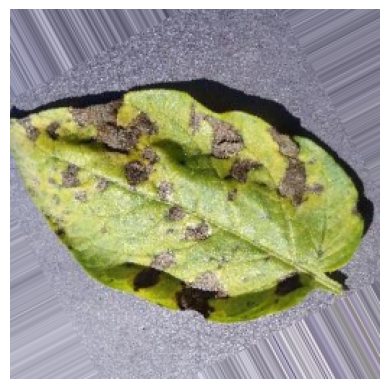

In [31]:
class_names =['Early_blight','Late_blight', 'Healthy']
for image_batch,label_batch in train_generator:
    first_image = image_batch[0]      # Here train_generator has images in batches. Each
    first_label = int(label_batch[0]) # batch has 32 images.
    plt.imshow(first_image)
    plt.axis('off')
    print("True label:",class_names[first_label])
    print("Predcited label:",class_names[np.argmax(model.predict(image_batch)[0])])
    #print(np.argmax(model.predict(image_batch)[0]))
    break

In [21]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence  = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 45ms/step


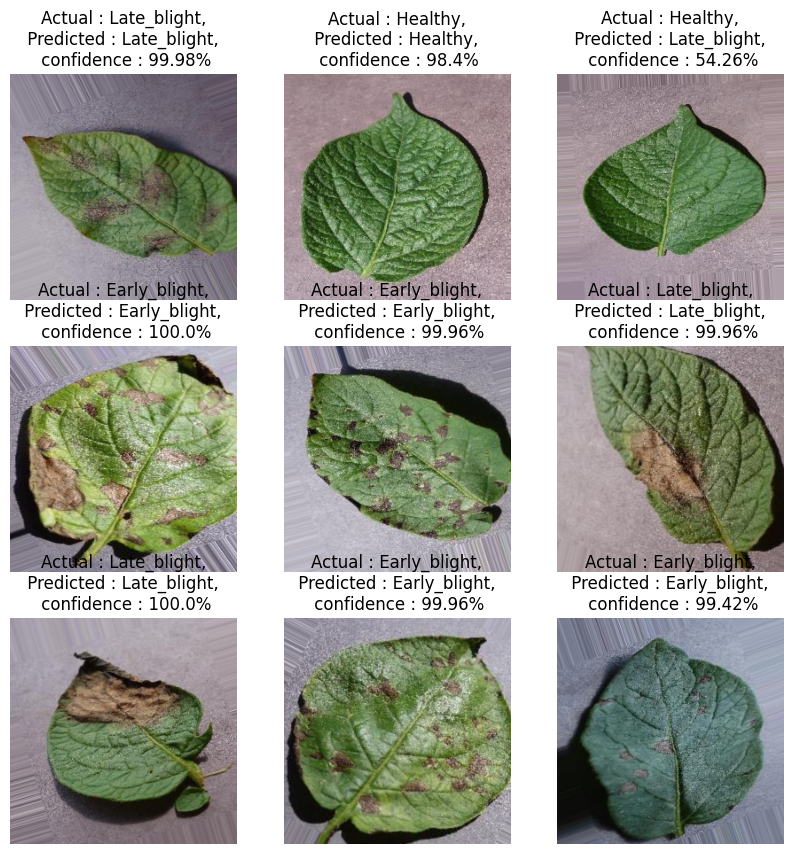

In [25]:
plt.figure(figsize=(10,10))
for images,labels in train_generator:
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        
        plt.axis("off")
        predicted_class,confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class}, \n confidence : {confidence}%")
    break

#### Confusion Matrix

1/1 [==============================] - 0s 149ms/step


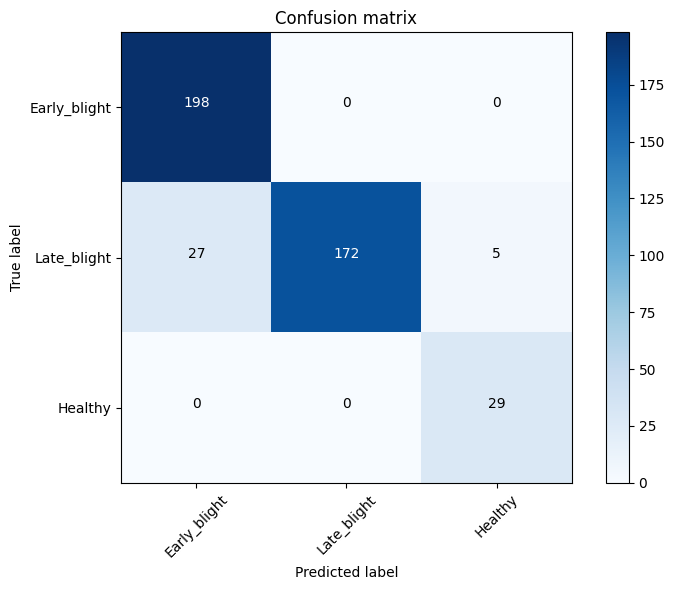

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Assuming you have predictions stored in y_pred and true labels in y_true
y_true = []
y_pred = []

class_names = ['Early_blight', 'Late_blight', 'Healthy']
num_batches = len(test_generator)

# Iterate over the test data to collect true labels and predictions
for i, (image_batch, label_batch) in enumerate(test_generator):
    y_true.extend(label_batch)
    # Make predictions for the current batch
    predictions = model.predict(image_batch)
    y_pred.extend(np.argmax(predictions, axis=1))
    # Check if we've reached the end of the generator
    if i + 1 == num_batches:
        break


# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#### Classification Report

In [41]:
29/34

0.8529411764705882

In [42]:
198/(198+27)

0.88

In [39]:
from sklearn.metrics import classification_report

num_batches = len(test_generator)
# y_pred and y_true should be lists of class labels
y_true = []
y_pred = []

# Iterate over the test data to collect true labels and predictions
for i, (image_batch, label_batch) in enumerate(test_generator):
    # Make predictions for the current batch 
    predictions = model.predict(image_batch)
    y_true.extend(label_batch)
    y_pred.extend(np.argmax(predictions, axis=1))
    # Check if we've reached the end of the generator
    if i + 1 == num_batches:
        break


# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the report
print(report)


1/1 [==============================] - 0s 131ms/step
              precision    recall  f1-score   support

Early_blight       0.92      1.00      0.96       206
 Late_blight       1.00      0.88      0.94       196
     Healthy       0.88      1.00      0.94        29

    accuracy                           0.95       431
   macro avg       0.93      0.96      0.94       431
weighted avg       0.95      0.95      0.95       431

